In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("Cleaned_Data.csv")
df

,Unnamed: 0,text,target,Clean_text
0,0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may forgive
1,1,Forest fire near La Ronge Sask. Canada,1,forest fire near la canada
2,2,All residents asked to 'shelter in place' are ...,1,resident shelter place notified officer evacua...
3,3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order
4,4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby smoke wildfire school
...,...,...,...,...
7574,7608,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...
7575,7609,@aria_ahrary @TheTawniest The out of control w...,1,aria control wild fire even northern part stat...
7576,7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,volcano
7577,7611,Police investigating after an e-bike collided ...,1,police investigating e bike car little e bike ...


In [5]:
y = df["target"]
y.value_counts()

target
0    4314
1    3265
Name: count, dtype: int64

In [7]:
X = df['Clean_text']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=10)

In [11]:
pipeline = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('classifier',GaussianNB())
])

In [13]:
param_grid =[
    {
        'classifier': [BernoulliNB(), MultinomialNB()],
        'vectorizer__max_features': [None, 10, 100, 1000, 2000],
        'classifier__alpha': [0.1, 0.5, 1, 10]  
    },
    {
        'classifier': [GaussianNB()], 
        'vectorizer__max_features': [None, 10, 100, 1000, 2000]
    }
]

In [15]:
grid = GridSearchCV(pipeline,param_grid,cv=5,scoring='f1',n_jobs = -1)

In [17]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', GaussianNB())]),
             n_jobs=-1,
             param_grid=[{'classifier': [BernoulliNB(), MultinomialNB(alpha=1)],
                          'classifier__alpha': [0.1, 0.5, 1, 10],
                          'vectorizer__max_features': [None, 10, 100, 1000,
                                                       2000]},
                         {'classifier': [GaussianNB()],
                          'vectorizer__max_features': [None, 10, 100, 1000,
                                                       2000]}],
             scoring='f1')

In [19]:
grid.best_params_

{'classifier': MultinomialNB(alpha=1),
 'classifier__alpha': 1,
 'vectorizer__max_features': 2000}

In [21]:
y_pred = grid.predict(X_test)

In [23]:
print(accuracy_score(y_test,y_pred))

0.8126649076517151


In [25]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       427
           1       0.80      0.76      0.78       331

    accuracy                           0.81       758
   macro avg       0.81      0.81      0.81       758
weighted avg       0.81      0.81      0.81       758



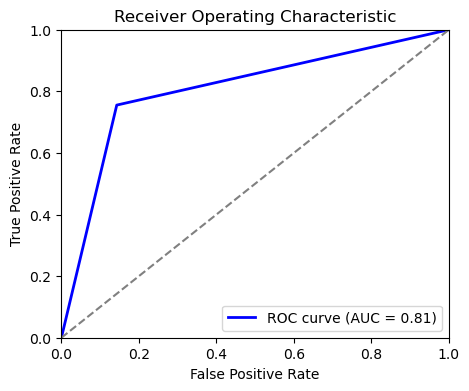

In [27]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [8]:
# import joblib
# joblib.dump(bnb, 'NB_Vect.pkl')